In [ ]:
#Import Libraries

import os
from itertools import chain
import json
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.json import json_normalize
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
#pip install spacy==2.2.3
#python -m spacy download en_core_web_sm
#pip install beautifulsoup4==4.9.1
#pip install textblob==0.15.3
#from dataclasses import dataclass
#import spacy.cli
#import spacy
#spacy.cli.download("en_core_web_sm",'--no-deps')

#download("en_core_web_sm")


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
path = r"/content/tweets_ws22_v1.json"

with open(path) as f:
   
      dump = json.loads(f.read())
      org_df = pd.json_normalize(dump)
      org_df
    
final_df = pd.DataFrame() 

for i in range(0,len(dump)):
    temp_topic_df = pd.json_normalize(dump[i]['labels']['topic'])
    temp_sentiment_df = pd.json_normalize(dump[i]['labels']['sentiment'])
    temp_topic_df.rename(columns={'id':'topic_id','tweet_id':'topic_tweet_id','user_id':'topic_user_id','ground_truth':'topic_ground_truth'}, inplace = True)
    temp_sentiment_df.rename(columns={'id':'sentiment_id','tweet_id':'sentiment_tweet_id','user_id':'sentiment_user_id','ground_truth':'sentiment_ground_truth'}, inplace = True)
    df_join_topic_sent = temp_topic_df.join(temp_sentiment_df)
    final_df = final_df.append(df_join_topic_sent)
    #final_df = pd.concat([org_df,Joined_df],axis = 1)
    
    
cols = final_df.columns
org_df[cols] = final_df[cols].values


data =  org_df.drop(columns=['labels.topic','labels.sentiment','topic_tweet_id','sentiment_tweet_id','author_id','source','topic_user_id','topic_ground_truth','language','id','source_id','relevant','sentiment_ground_truth','sentiment_id','topic_id','sentiment_user_id'])
data


,source_created_at,text,longitude,latitude,topic,sentiment
0,2020-09-18 21:56:20.798000,@DSisourath The Thameslink core between London...,-0.12574,51.50853,service,negative
1,2020-10-13 07:31:53.122000,@DulwichHistory Loving the complaint about peo...,-0.12574,51.50853,delays,negative
2,2020-10-26 19:27:24.695000,@SW_Help .And yet you have no toilets on some ...,-0.12574,51.50853,toilets,negative
3,2020-10-26 19:28:49.281000,@SW_Help you have no toilets on some of your t...,-0.12574,51.50853,toilets,negative
4,2020-09-28 11:59:41.212000,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,-1.09125,50.79899,seats,neutral
...,...,...,...,...,...,...
16944,2019-07-11 07:34:35,Haha oh man the audio corruption on @TLRailUK ...,NaN,NaN,announcements,neutral
16945,2020-08-10 11:19:10.181000,@TLRailUK SweetIs there a plug to charge my ph...,-0.12574,51.50853,plugs,neutral
16946,2020-08-29 09:51:10.833000,@TLRailUK now there are far fewer commuters ha...,-0.12574,51.50853,tables,neutral
16947,2020-11-02 12:06:06.967000,@geofftech I am voting for Thameslink. 1. in a...,-0.12574,51.50853,toilets,neutral


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source_created_at  16949 non-null  object 
 1   text               16949 non-null  object 
 2   longitude          1425 non-null   float64
 3   latitude           1425 non-null   float64
 4   topic              16949 non-null  object 
 5   sentiment          16949 non-null  object 
dtypes: float64(2), object(4)
memory usage: 794.6+ KB


In [ ]:
pip install text-hammer==0.1.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 5.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import text_hammer as th

In [ ]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
#     df[column] = df[column].progress_apply(lambda x: ps.remove_stopwords(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))

    return(df)

In [ ]:
cleaned_df = text_preprocessing(data,'text')
cleaned_df.head()

  0%|          | 0/16949 [00:00<?, ?it/s]

  0%|          | 0/16949 [00:00<?, ?it/s]

  0%|          | 0/16949 [00:00<?, ?it/s]

  0%|          | 0/16949 [00:00<?, ?it/s]

  0%|          | 0/16949 [00:00<?, ?it/s]

,source_created_at,text,longitude,latitude,topic,sentiment
0,2020-09-18 21:56:20.798000,dsisourath the thameslink core between london ...,-0.12574,51.50853,service,negative
1,2020-10-13 07:31:53.122000,dulwichhistory loving the complaint about peop...,-0.12574,51.50853,delays,negative
2,2020-10-26 19:27:24.695000,sw_help and yet you have no toilets on some of...,-0.12574,51.50853,toilets,negative
3,2020-10-26 19:28:49.281000,sw_help you have no toilets on some of your tr...,-0.12574,51.50853,toilets,negative
4,2020-09-28 11:59:41.212000,speedysticks007 mrneiljh tlrailuk christianwol...,-1.09125,50.79899,seats,neutral


In [ ]:
#Preparing data for Bert Architecture format

In [ ]:
cleaned_df['num_words'] = cleaned_df.text.apply(lambda x:len(x.split()))
cleaned_df.num_words.max()

87

In [ ]:
# changing the data type to the category to encode into codes 
cleaned_df['topic'] = cleaned_df.topic.astype('category')
cleaned_df.topic

0              service
1               delays
2              toilets
3              toilets
4                seats
             ...      
16944    announcements
16945            plugs
16946           tables
16947          toilets
16948    announcements
Name: topic, Length: 16949, dtype: category
Categories (23, object): ['air conditioning', 'announcements', 'brakes', 'covid', ..., 'train_general',
                          'vandalism', 'wifi', 'windows']

In [ ]:
cleaned_df['topic_encoded']  =  cleaned_df["topic"].cat.codes
cleaned_df.topic

0              service
1               delays
2              toilets
3              toilets
4                seats
             ...      
16944    announcements
16945            plugs
16946           tables
16947          toilets
16948    announcements
Name: topic, Length: 16949, dtype: category
Categories (23, object): ['air conditioning', 'announcements', 'brakes', 'covid', ..., 'train_general',
                          'vandalism', 'wifi', 'windows']

In [ ]:
cleaned_df.head()

,source_created_at,text,longitude,latitude,topic,sentiment,num_words,topic_encoded
0,2020-09-18 21:56:20.798000,dsisourath the thameslink core between london ...,-0.12574,51.50853,service,negative,21,14
1,2020-10-13 07:31:53.122000,dulwichhistory loving the complaint about peop...,-0.12574,51.50853,delays,negative,19,4
2,2020-10-26 19:27:24.695000,sw_help and yet you have no toilets on some of...,-0.12574,51.50853,toilets,negative,27,18
3,2020-10-26 19:28:49.281000,sw_help you have no toilets on some of your tr...,-0.12574,51.50853,toilets,negative,29,18
4,2020-09-28 11:59:41.212000,speedysticks007 mrneiljh tlrailuk christianwol...,-1.09125,50.79899,seats,neutral,37,13


In [ ]:
from tensorflow.keras.utils import to_categorical
to_categorical(cleaned_df.topic_encoded,23)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(cleaned_df, test_size = 0.3, random_state = 42, stratify = cleaned_df.topic_encoded)

In [ ]:
data_train.shape


(11864, 8)

In [ ]:
data_test.shape

(5085, 8)

In [ ]:
data_train['topic_encoded'].value_counts()

4     6316
10    1613
14     619
15     528
21     434
19     269
3      262
1      221
13     198
18     197
17     191
20     191
0      176
5      138
16     132
8      120
11      95
9       54
22      35
6       32
2       31
12      11
7        1
Name: topic_encoded, dtype: int64

In [ ]:
data_test['topic_encoded'].value_counts()

4     2707
10     691
14     265
15     226
21     186
19     116
3      113
1       94
18      85
13      85
20      82
17      82
0       76
5       59
16      57
8       52
11      40
9       23
22      15
2       13
6       13
12       4
7        1
Name: topic_encoded, dtype: int64

In [ ]:
!pip install transformers
from transformers import AutoTokenizer,TFDistilBertModel
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-cased')
dbert = TFDistilBertModel.from_pretrained('distilbert-base-cased')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.9 MB/s 
     |████████████████████████████████| 7.6 MB 42.4 MB/s 
     |████████████████████████████████| 182 kB 45.0 MB/s 


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/354M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-cased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_layer_norm', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
tokenizer.save_pretrained('bert-tokenizer2')
dbert.save_pretrained('dbert-model2')

In [ ]:
import shutil
shutil.make_archive('bert-tokenizer2','zip','bert-tokenizer2')

'/content/bert-tokenizer2.zip'

In [ ]:
shutil.make_archive('dbert-model2','zip','dbert-model2')

'/content/dbert-model2.zip'

In [ ]:
# Tokenize the input  

x_train = tokenizer(
    text=data_train.text.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)


x_test = tokenizer(
    text=data_test.text.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

# Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

In [ ]:
#import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
#tf.config.experimental.list_physical_devices('GPU')

In [ ]:
import tensorflow as tf

import os
import tensorflow_datasets as tfds

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
max_len = 70
   
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
    


embeddings = dbert(input_ids,attention_mask = input_mask)[0] #(0 is the last hidden states,1 means pooler_output)
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)

y = Dense(23,activation = 'softmax')(out)
    
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

#return model, tokenizer


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 70)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 70)]         0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  65190912   ['input_ids[0][0]',              
 BertModel)                     ast_hidden_state=(N               'attention_mask[0][0]']         
                                one, 70, 768),                                                    
                                 hidden_states=None                                           

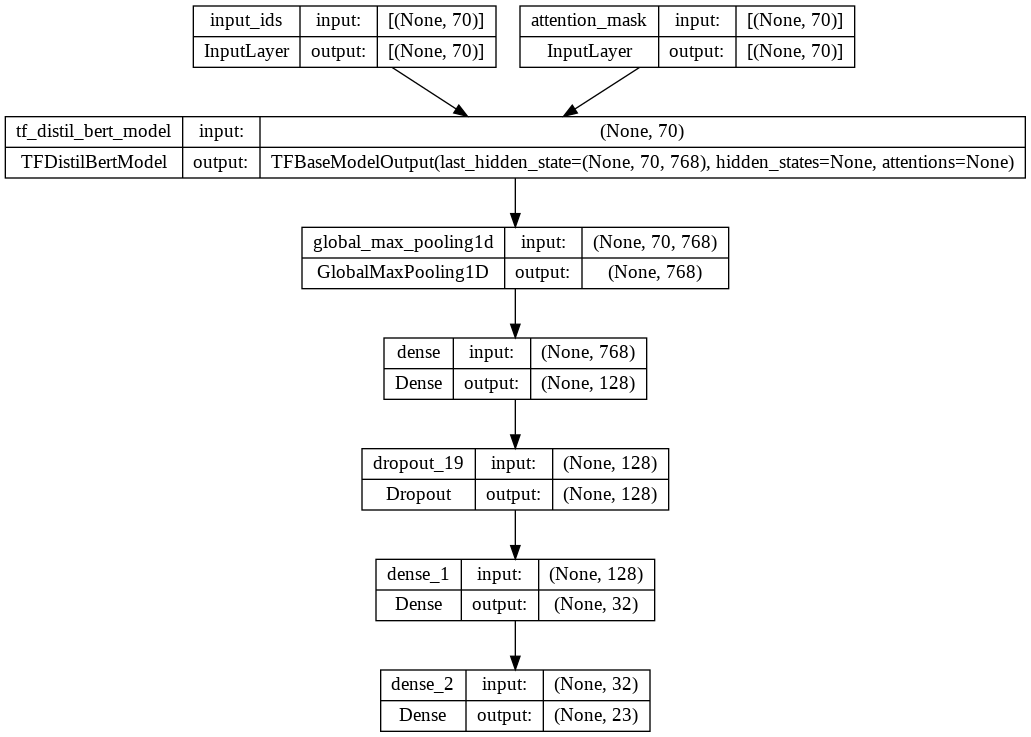

In [ ]:
tf.keras.utils.plot_model(model,show_shapes = True)

In [ ]:
optimizer = Adam(learning_rate = 5e-05, epsilon=1e-08, decay =0.01,clipnorm= 1.0)

loss = CategoricalCrossentropy(from_logits = True)
metric = CategoricalAccuracy('balanced_accuracy'),

#compile model
model.compile(optimizer =optimizer,loss = loss,metrics =metric)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
#Model fit and evaluation

In [ ]:
train = model.fit(x= {'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']},
                  y=to_categorical(data_train.topic_encoded,23),
                  validation_data= ({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']},to_categorical(data_test.topic_encoded,23)),
                  epochs =10,
                  batch_size =100,
                 )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


119/119 [==============================] - 1230s 10s/step - loss: 1.4516 - balanced_accuracy: 0.6204 - val_loss: 1.0879 - val_balanced_accuracy: 0.6887
Epoch 2/10
119/119 [==============================] - 1232s 10s/step - loss: 0.9798 - balanced_accuracy: 0.7192 - val_loss: 0.8999 - val_balanced_accuracy: 0.7396
Epoch 3/10
119/119 [==============================] - 1233s 10s/step - loss: 0.8083 - balanced_accuracy: 0.7606 - val_loss: 0.8500 - val_balanced_accuracy: 0.7567
Epoch 4/10
119/119 [==============================] - 1238s 10s/step - loss: 0.7041 - balanced_accuracy: 0.7867 - val_loss: 0.8584 - val_balanced_accuracy: 0.7544
Epoch 5/10
119/119 [==============================] - 1243s 10s/step - loss: 0.6496 - balanced_accuracy: 0.8002 - val_loss: 0.8488 - val_balanced_accuracy: 0.7561
Epoch 6/10
119/119 [==============================] - 1242s 10s/step - loss: 0.5925 - balanced_accuracy: 0.8157 - val_loss: 0.8556 - val_balanced_accuracy: 0.7587
Epoch 7/10
119/119 [=============

In [ ]:
model.save_weights('sentiment_weights4.h5')

In [ ]:
model.load_weights('sentiment_weights4.h5')

In [ ]:
#Model prediction 

In [ ]:
predict = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})

159/159 [==============================] - 426s 3s/step


In [ ]:
y_predicted = np.argmax(predict,axis =1)

In [ ]:
data_test.sentiment #ytrue

11058     neutral
703       neutral
13384    negative
1783      neutral
13918    positive
           ...   
13345     neutral
4647     negative
7196     negative
4987     negative
6899     negative
Name: sentiment, Length: 5085, dtype: object

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(data_test.topic_encoded,y_predicted ))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83        76
           1       0.57      0.57      0.57        94
           2       0.00      0.00      0.00        13
           3       0.83      0.81      0.82       113
           4       0.90      0.94      0.92      2707
           5       0.49      0.47      0.48        59
           6       0.23      0.23      0.23        13
           7       0.00      0.00      0.00         1
           8       0.83      0.87      0.85        52
           9       0.48      0.61      0.54        23
          10       0.58      0.57      0.57       691
          11       0.60      0.60      0.60        40
          12       0.00      0.00      0.00         4
          13       0.55      0.76      0.64        85
          14       0.22      0.13      0.16       265
          15       0.41      0.46      0.44       226
          16       0.49      0.61      0.54        57
          17       0.24    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report
#from sklearn.metrics import scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
print(f'Confusion matrix  \n {confusion_matrix(data_test.topic_encoded,y_predicted)}' )
    #print(f'ROC AUC  : {roc_auc_score(data_test.topic,y_predicted)}' )
    #tn, fp, fn, tp = confusion_matrix(data_test.topic,y_predicted).ravel()
    #print('sensitivity is %f',1.*tp/(tp+fn))
    #print('specificity is %f',1.*tn/(tn+fp))
    #print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
    #print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))
    #print('Type1 Error is %f',1.*(fp))
    #print('Type2 Error is %f',1.*(fn))

Confusion matrix  
 [[  62    0    0    0    0    0    0    0    7    0    3    0    0    0
     0    0    0    0    0    0    0    1    3]
 [   0   54    0    0    6    1    0    0    0    0   14    0    0    0
     7   10    0    0    2    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    4    4    0    0    0
     0    0    0    0    0    5    0    0    0]
 [   0    0    0   92    4    1    0    0    0    0   10    0    0    0
     2    3    0    1    0    0    0    0    0]
 [   0    5    0    3 2555    3    0    0    0    0   47    0    0    1
    30   37    0   18    0    4    1    3    0]
 [   0    0    0    2    1   28    0    0    0    1   12    0    0    0
     9    1    0    0    3    1    1    0    0]
 [   1    0    0    0    0    0    3    0    0    0    1    0    0    0
     0    1    0    0    0    0    7    0    0]
 [   0    0    0    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   4    0    0    

In [ ]:
# testing the model

In [ ]:
input_text = input(str('input the text'))

x_val = tokenizer(
        text=input_text,
        add_special_tokens=True,
        max_length=70,truncation=True,
        padding='max_length', 
        return_tensors='tf',
        return_token_type_ids = False,
        return_attention_mask = True,verbose = True)
validation = model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100 
validation

input the textthere is no place for us
1/1 [==============================] - 2s 2s/step


array([[9.0098774e-01, 3.7869446e-02, 2.3442661e-02, 2.3824480e+00,
        3.2734215e+01, 1.8748228e-01, 1.2389056e-02, 5.2506924e-01,
        3.3868831e-01, 2.4862620e-01, 4.0119480e+01, 3.1620473e-01,
        8.5937209e-02, 4.0870792e-01, 7.6306763e+00, 5.0732708e+00,
        2.9431603e+00, 1.4479793e+00, 1.8913609e-01, 1.0062118e+00,
        1.1028817e-01, 1.8374598e+00, 1.4402781e+00]], dtype=float32)

In [ ]:
encoded_dict  = {'air conditioning':0,'announcements':1, 'brakes':2,'covid':3,'delays':4,'doors':5,'floor':6,'handrails':7,'hvac':8,'noise':9,'none':10,'plugs':11,'roof':12,'seats':13,'service':14,'station':15,'tables':16,'tickets/seat reservations':17,'toilets':18,'train_general':19,'vandalism':20,'wifi':21,'windows':22}

In [ ]:
for key,value in zip(encoded_dict.keys(),validation[0]):
    print(key,value)

air conditioning 0.90098774
announcements 0.037869446
brakes 0.023442661
covid 2.382448
delays 32.734215
doors 0.18748228
floor 0.012389056
handrails 0.52506924
hvac 0.3386883
noise 0.2486262
none 40.11948
plugs 0.31620473
roof 0.08593721
seats 0.40870792
service 7.6306763
station 5.073271
tables 2.9431603
tickets/seat reservations 1.4479793
toilets 0.18913609
train_general 1.0062118
vandalism 0.11028817
wifi 1.8374598
windows 1.440278


In [ ]:
x = max(validation[0])
y = np.argmax(validation, axis=1)
print ("The maximum is", x)
print("The index is",y)
for key,value in zip(encoded_dict.keys(),validation[0]):
    if value == x:
      print("The key and values are :-", key, value)

The maximum is 40.11948
The index is [10]
The key and values are :- none 40.11948
